In [ ]:
import pandas as pd
import numpy as np
import folium
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
# Generación de datos sintéticos (simulando crímenes)
np.random.seed(42)
n = 1000
data = pd.DataFrame({
    'latitud': np.random.uniform(low=4.6, high=4.8, size=n),  # Coordenadas de Colombia (Bogotá)
    'longitud': np.random.uniform(low=-74.1, high=-73.9, size=n),
    'fecha': pd.date_range(start='2024-01-01', periods=n, freq='H'),
    'tipo_crimen': np.random.choice(['robo', 'hurto', 'violencia'], size=n),
    'delito_ocurrido': np.random.randint(0, 2, size=n)  # Binario: 1 = Delito ocurrido, 0 = No
})

<ipython-input-2-2bdf387980fd>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'fecha': pd.date_range(start='2024-01-01', periods=n, freq='H'),


In [ ]:
# Preprocesamiento
data['hora'] = data['fecha'].dt.hour
X = data[['latitud', 'longitud', 'hora']]
y = data['delito_ocurrido']

In [ ]:
# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicciones
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluación
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.53      0.51      0.52       154
           1       0.51      0.53      0.52       146

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300

ROC AUC Score: 0.511519302615193


In [ ]:
# Visualización en mapa con Folium
m = folium.Map(location=[4.7, -74.0], zoom_start=12)

In [ ]:
# Visualización en mapa con Folium
m = folium.Map(location=[4.7, -74.0], zoom_start=12)

# Use enumerate to get the index within y_pred
for idx, (i, row) in enumerate(X_test.iterrows()):
    color = 'red' if y_pred[idx] == 1 else 'green'  # Use idx to access y_pred
    folium.CircleMarker([row['latitud'], row['longitud']], radius=5, color=color).add_to(m)

m.save('mapa_predicciones.html')  # Guarda el mapa como archivo HTML

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve


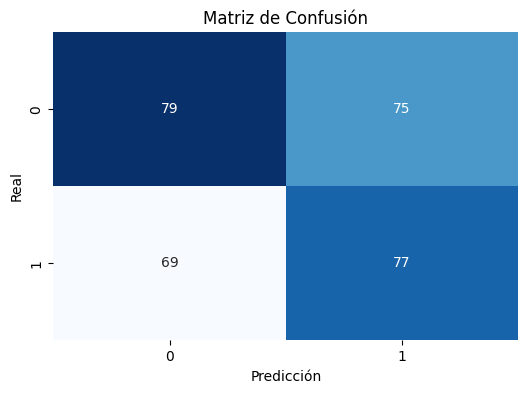

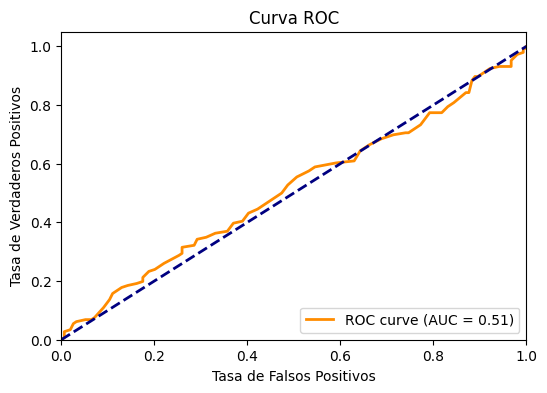

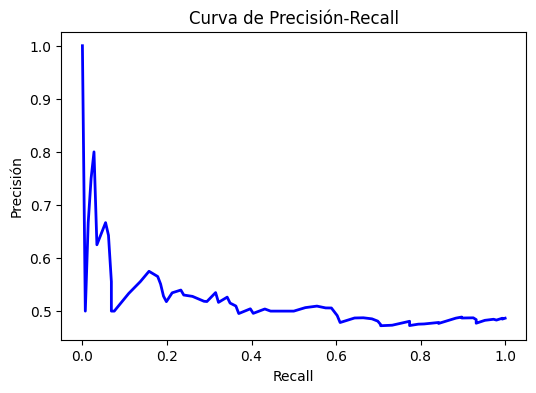

In [ ]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Curva de Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recall')
plt.show()

**Proyección para próximos tres meses**

<ipython-input-18-dca62f2ddb9f>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas_futuras = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='H')  # Cada hora


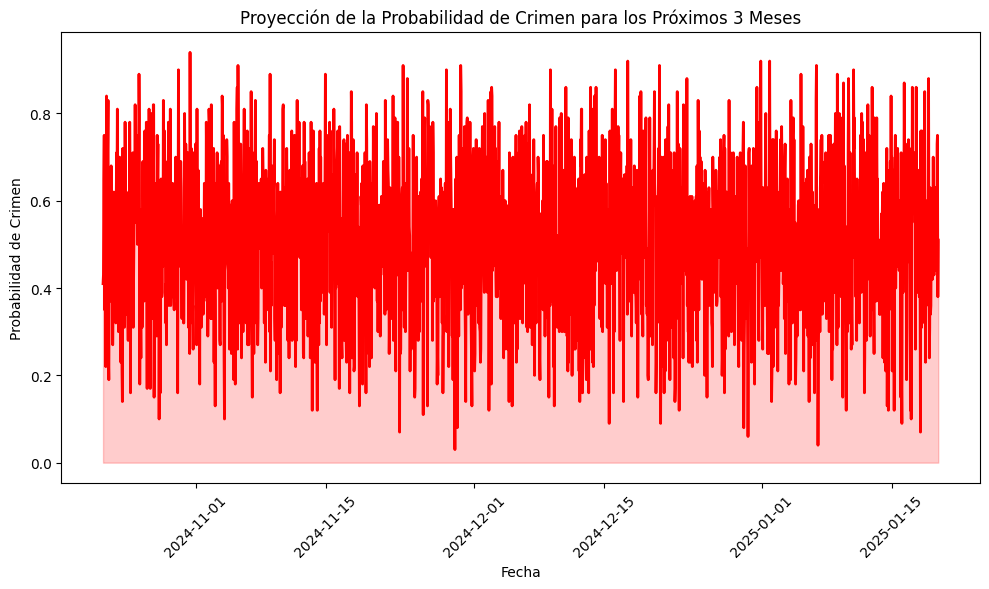

In [ ]:
from datetime import timedelta

# Simular datos futuros para los próximos 3 meses
fecha_inicio = pd.to_datetime('2024-10-22')
fecha_fin = fecha_inicio + timedelta(days=90)  # Tres meses
fechas_futuras = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='H')  # Cada hora

# Generamos datos de latitud y longitud para la simulación (ejemplo: Bogotá)
n_futuro = len(fechas_futuras)
latitudes_futuras = np.random.uniform(low=4.6, high=4.8, size=n_futuro)
longitudes_futuras = np.random.uniform(low=-74.1, high=-73.9, size=n_futuro)
horas_futuras = fechas_futuras.hour

# Crear un DataFrame con los datos simulados
data_futuro = pd.DataFrame({
    'latitud': latitudes_futuras,
    'longitud': longitudes_futuras,
    'hora': horas_futuras,
    'fecha': fechas_futuras
})

# Usar el modelo entrenado para predecir las probabilidades de crimen en los próximos 3 meses
X_futuro = data_futuro[['latitud', 'longitud', 'hora']]
data_futuro['probabilidad_crimen'] = rf.predict_proba(X_futuro)[:, 1]

# Graficar la proyección de probabilidades en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(data_futuro['fecha'], data_futuro['probabilidad_crimen'], color='r', lw=2)
plt.fill_between(data_futuro['fecha'], data_futuro['probabilidad_crimen'], color='r', alpha=0.2)
plt.title('Proyección de la Probabilidad de Crimen para los Próximos 3 Meses')
plt.xlabel('Fecha')
plt.ylabel('Probabilidad de Crimen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

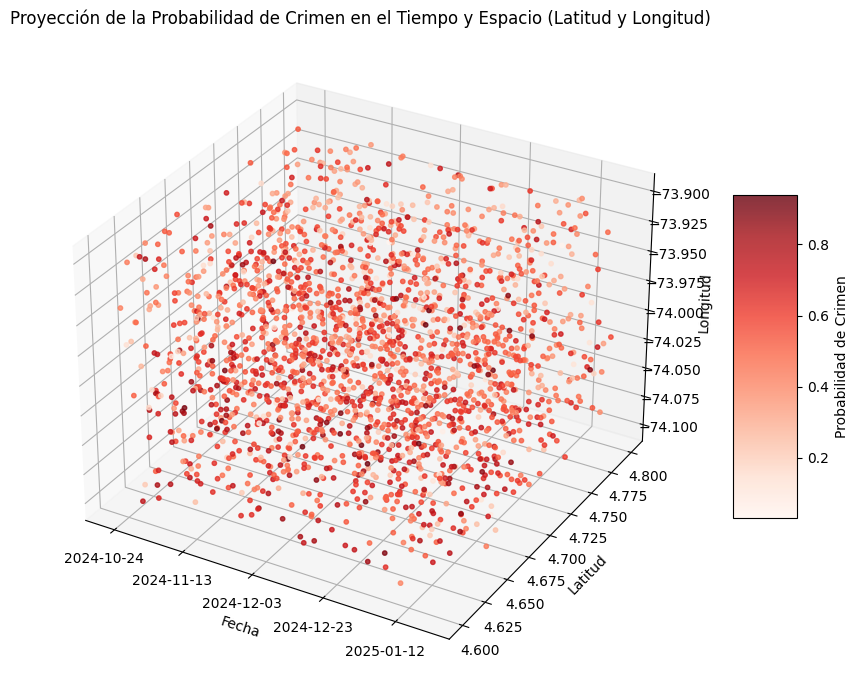

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

# Usar el mismo conjunto de datos simulados
X_futuro = data_futuro[['latitud', 'longitud', 'hora']]
data_futuro['probabilidad_crimen'] = rf.predict_proba(X_futuro)[:, 1]

# Convertir las fechas a valores numéricos usando mdates.date2num
data_futuro['fecha_num'] = mdates.date2num(data_futuro['fecha'])

# Gráfico 3D de la proyección de crimen en tiempo y lugar
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Asignar las variables de tiempo (fecha_num), ubicación (latitud, longitud) y la probabilidad de crimen
x = data_futuro['fecha_num']
y = data_futuro['latitud']
z = data_futuro['longitud']
c = data_futuro['probabilidad_crimen']

# Scatter plot 3D con la probabilidad de crimen codificada por color
scat = ax.scatter(x, y, z, c=c, cmap='Reds', s=10, alpha=0.8)

# Etiquetas y título
ax.set_xlabel('Fecha')
ax.set_ylabel('Latitud')
ax.set_zlabel('Longitud')
ax.set_title('Proyección de la Probabilidad de Crimen en el Tiempo y Espacio (Latitud y Longitud)')

# Barra de colores
cbar = fig.colorbar(scat, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Probabilidad de Crimen')

# Formatear el eje X para que muestre las fechas correctamente
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato de fecha

# Ajustar el layout
plt.tight_layout()
plt.show()